### Clean data for machine learning.

In [27]:
import pandas as pd
import numpy as np

filename = "../datasets/immo-eliza/properties.csv"
df = pd.read_csv(filename)
print(df.shape)
df.head()


(75511, 30)


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [28]:
# Check how many rows of each attribute are NaN
print ((df.isnull().sum()).sort_values(ascending=False)) 


cadastral_income                  44967
surface_land_sqm                  36256
construction_year                 33391
primary_energy_consumption_sqm    26567
nbr_frontages                     26346
longitude                         14098
latitude                          14098
terrace_sqm                       13140
total_area_sqm                     7615
garden_sqm                         2939
province                              0
region                                0
subproperty_type                      0
property_type                         0
zip_code                              0
locality                              0
id                                    0
price                                 0
fl_open_fire                          0
fl_furnished                          0
nbr_bedrooms                          0
equipped_kitchen                      0
fl_garden                             0
fl_terrace                            0
fl_floodzone                          0


In [29]:
if (df.isnull().sum().sum()) != 0:

    #Replace empty strings if any.
    df.replace('', np.nan, inplace=True) 

    #Make NaN as the placeholder for every null value representation
    df.fillna(value=np.nan, inplace=True)


### Preprocess data for machine learning.

In [30]:
numeric_df = df.select_dtypes(include='number')
pd.DataFrame.corr(numeric_df)
price_correlation = pd.DataFrame(pd.DataFrame.corr(numeric_df)['price']).sort_values('price', ascending=False, key=abs)
price_correlation


,price
price,1.000000
nbr_bedrooms,0.352447
total_area_sqm,0.199650
fl_swimming_pool,0.196067
latitude,0.166984
surface_land_sqm,0.149360
nbr_frontages,0.146034
terrace_sqm,0.114349
longitude,-0.091013
garden_sqm,0.087180


In [31]:
#Drop columns with low price corr  
df = df.drop(columns=['epc','region','locality','latitude','longitude',
                       'cadastral_income','subproperty_type','fl_open_fire',
                       'construction_year','fl_double_glazing','id', 
                       'fl_floodzone', 'equipped_kitchen','fl_furnished','fl_garden','fl_terrace','fl_swimming_pool'])
df_cleaned = df[~df['heating_type'].isin(['MISSING'])]
#df_cleaned = df_cleaned[~df_cleaned['equipped_kitchen'].isin(['MISSING'])]
df_cleaned = df_cleaned[~df_cleaned['state_building'].isin(['MISSING'])]
df_cleaned = df_cleaned[~df_cleaned['primary_energy_consumption_sqm'].isna()]


numeric_df = df_cleaned.select_dtypes(include='number')
numeric_df
print(df_cleaned.shape[0])
print(df_cleaned.shape[1])


26355
13


In [32]:
from sklearn.impute import SimpleImputer

# Logical zero for Apartment not mean
numeric_df.fillna({'surface_land_sqm': 0}, inplace=True)

# Impute missing values in each column separately
imputer = SimpleImputer(strategy='mean')
numeric_df = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Check how many rows of each attribute are NaN
print ((numeric_df.isnull().sum()).sort_values(ascending=False))


price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
dtype: int64


Categorical columns
- property_type  [OneHotEncoder] --pip install -U scikit-learn
- state_building [Ordinal]
- heating_type [Ordinal]
- province [OneHotEncoder]

Text(0.5, 0, 'Price (Median)')

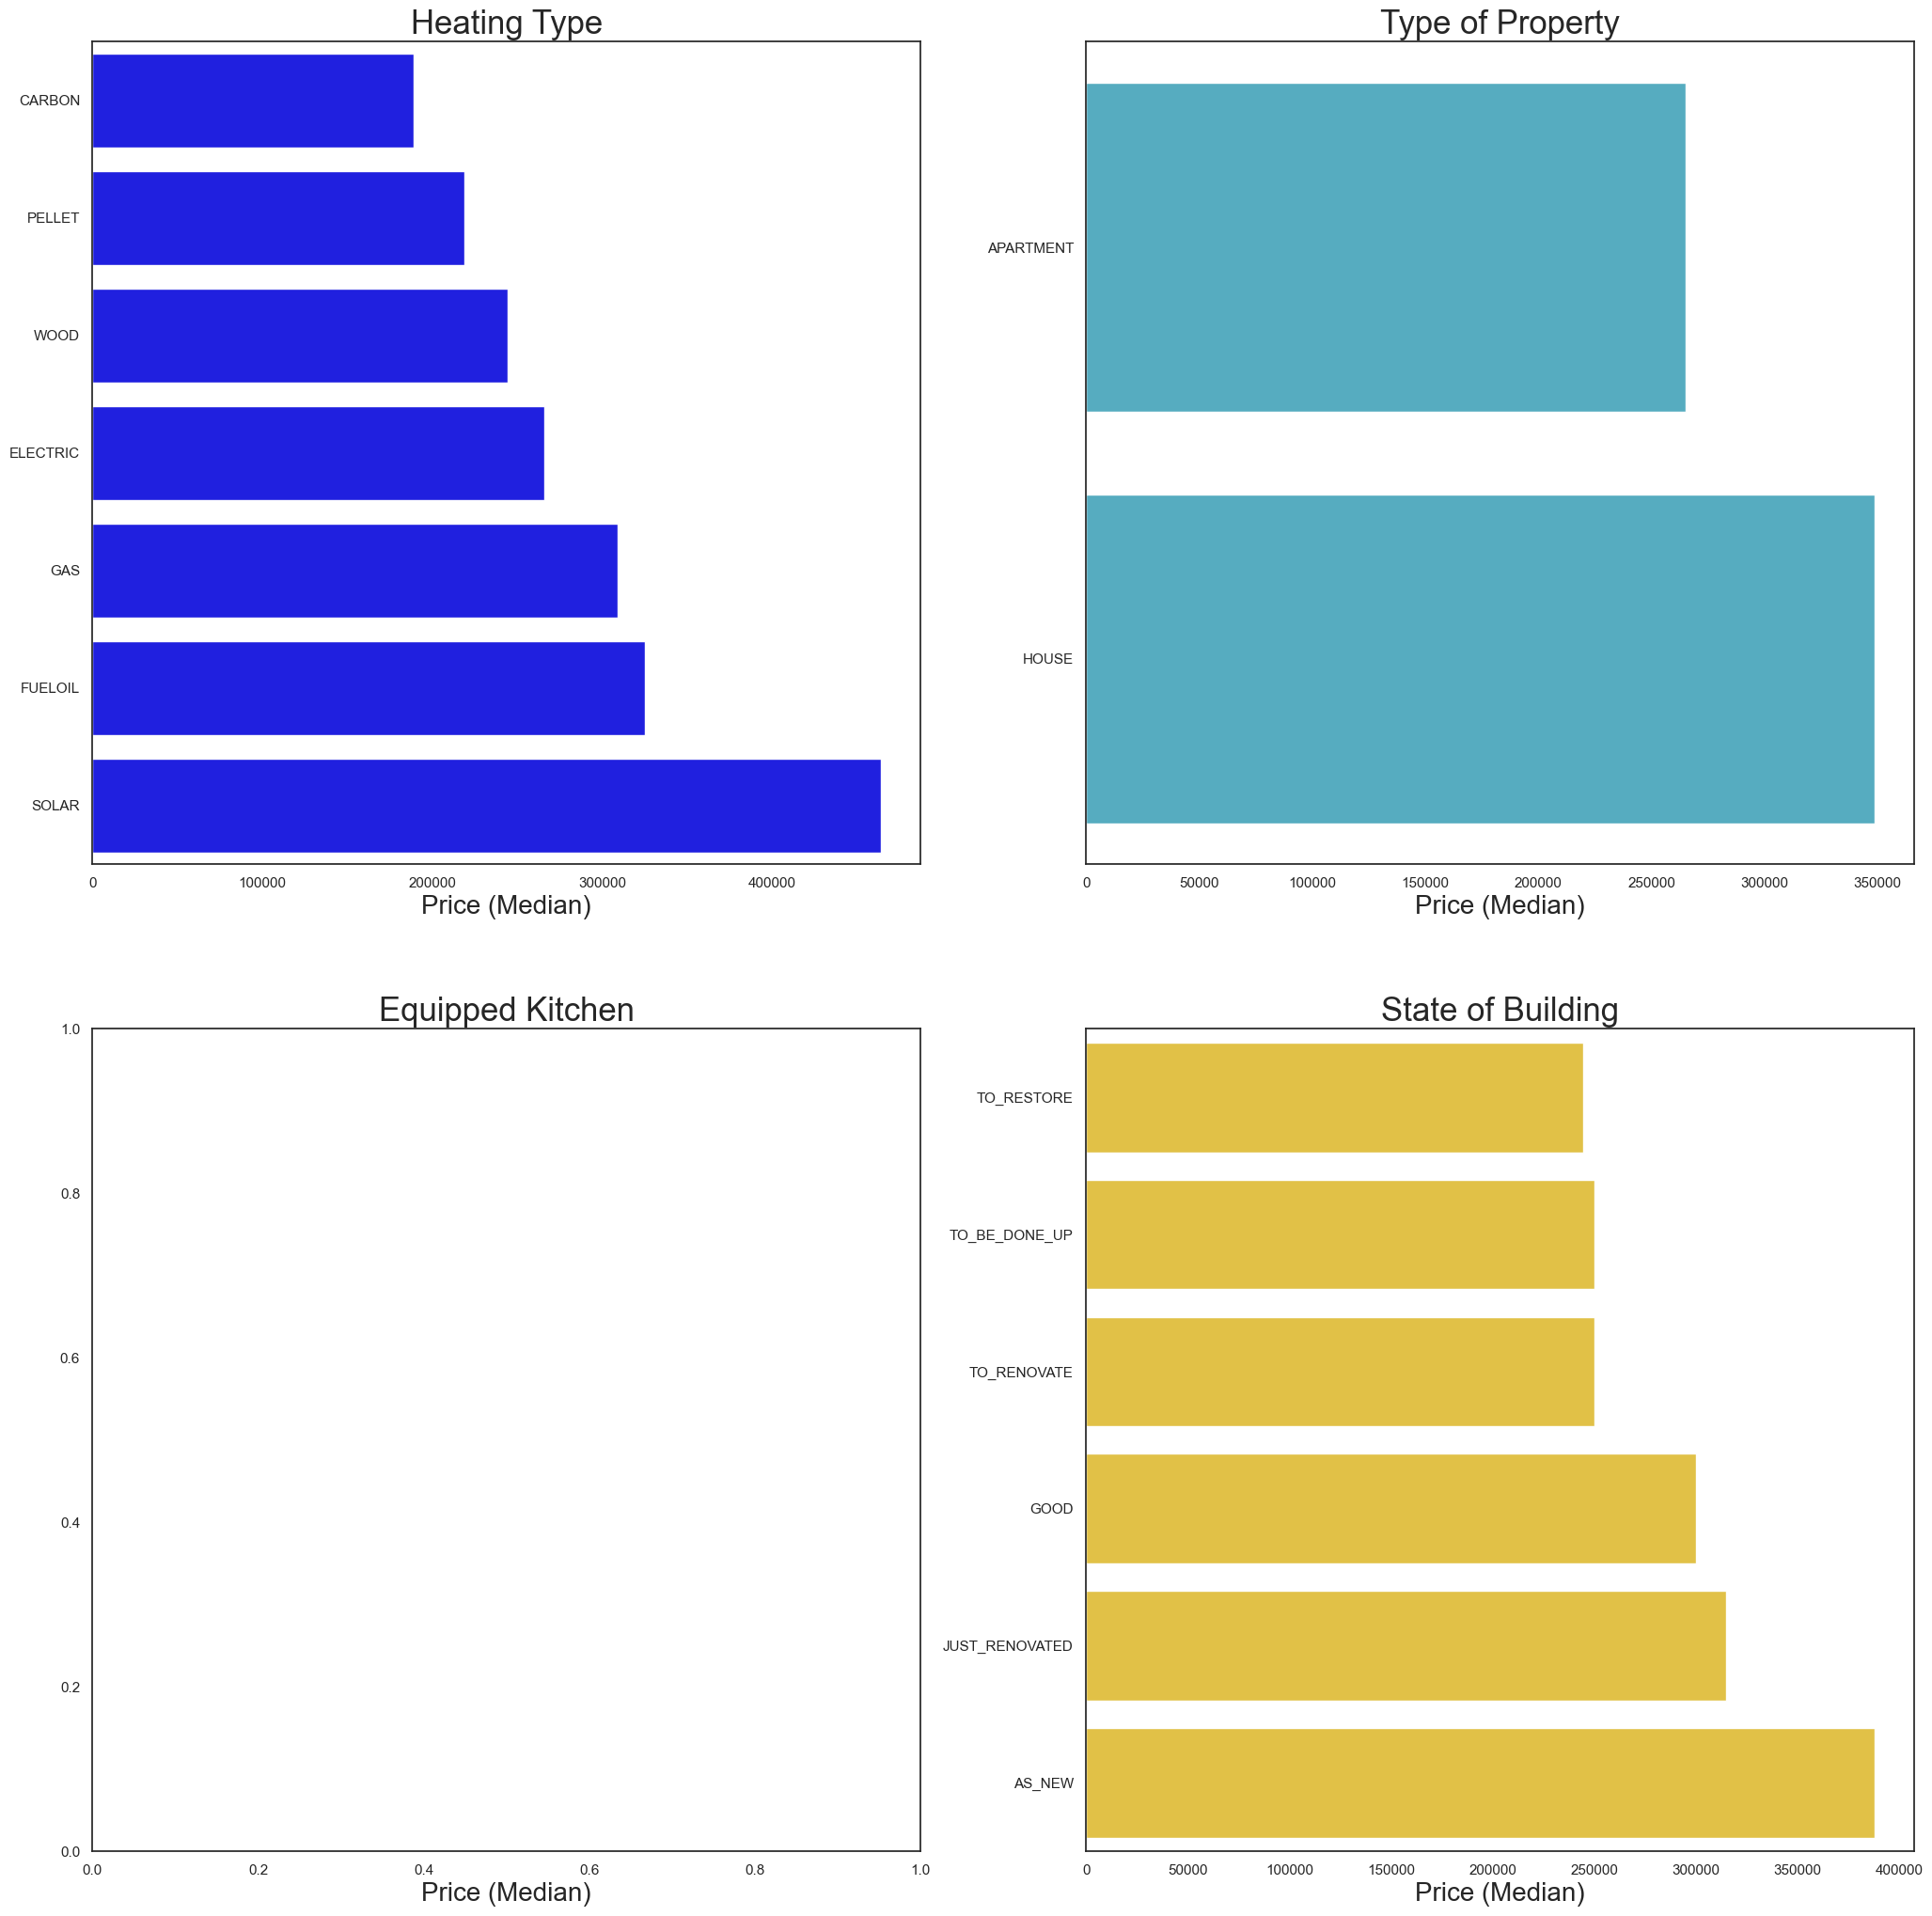

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#heating_type
df_building = pd.DataFrame(df_cleaned, columns= ['heating_type', 'price'])
df_building_median = pd.DataFrame(df_building.groupby('heating_type', as_index=False).median().sort_values(by='price'))


#kitchen
df_kitchen = pd.DataFrame(df_cleaned, columns= ['equipped_kitchen', 'price'])
df_kitchen_median = pd.DataFrame(df_kitchen.groupby('equipped_kitchen', as_index=False).median().sort_values(by='price'))

#state_building
df_state_building= pd.DataFrame(df_cleaned, columns= ['state_building', 'price'])
df_state_building_median = pd.DataFrame(df_state_building.groupby('state_building', as_index=False).median().sort_values(by='price'))

#type
df_type = pd.DataFrame(df_cleaned, columns= ['property_type', 'price'])
df_type_median = pd.DataFrame(df_type.groupby('property_type', as_index=False).median().sort_values(by='price'))



fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(25,25))
plt.rcParams["axes.labelsize"] = 15
sns.set_theme(style="white", palette='YlGnBu', color_codes=True)


sns.barplot(data= df_building_median, x=df_building_median.price, color='b', y=df_building_median.heating_type,
              ax=axs[0][0]).set_title("Heating Type", fontdict={'size': 25})

sns.barplot(data= df_type_median, x=df_type_median.price, color= "#45B7D1", y=df_type_median.property_type,  
            ax=axs[0][1]).set_title("Type of Property", fontdict={'size': 25})

sns.barplot(data= df_kitchen_median, x=df_kitchen_median.price,color= "g",  y=df_kitchen_median.equipped_kitchen, 
            ax= axs[1][0]).set_title("Equipped Kitchen", fontdict={'size': 25})

sns.barplot(data= df_state_building, x=df_state_building_median.price, color= '#FAD02E', y=df_state_building_median.state_building,
              ax=axs[1][1]).set_title("State of Building", fontdict={'size': 25})



(axs[0][0]).set_ylabel('', fontdict={'size': 20})
(axs[0][0]).set_xlabel('Price (Median)', fontdict={'size': 20})

(axs[0][1]).set_ylabel('')
(axs[0][1]).set_xlabel('Price (Median)', fontdict={'size': 20})


(axs[1][0]).set_ylabel('')
(axs[1][0]).set_xlabel('Price (Median)', fontdict={'size': 20})

(axs[1][1]).set_ylabel('')
(axs[1][1]).set_xlabel('Price (Median)', fontdict={'size': 20})

In [34]:
from sklearn.preprocessing import OneHotEncoder


property_type = df_cleaned[["property_type"]]
enc = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
property_type_encoded = enc.fit_transform(property_type)

# Make sure indexes match before joining to avoid NaN when joining
property_type_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(property_type_encoded)

print(numeric_df.isnull().sum())

price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
property_type_HOUSE               0
dtype: int64


In [35]:
print (property_type_encoded.isnull().sum())
numeric_df.rename(columns = {'property_type_HOUSE':'property_type'}, inplace = True)
print (numeric_df.isnull().sum())


property_type_HOUSE    0
dtype: int64
price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
property_type                     0
dtype: int64


In [ ]:

correlation_matrix = numeric_df[['property_type', 'price']].corr()
correlation_with_price = correlation_matrix['price']['property_type']
print(correlation_with_price)


In [36]:

province = df_cleaned[["province"]]
enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
province_encoded = enc.fit_transform(province)

# Make sure indexes match before joining to avoid NaN when joining
province_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(province_encoded)

print(numeric_df.isnull().sum())

price                             0
zip_code                          0
total_area_sqm                    0
surface_land_sqm                  0
nbr_frontages                     0
nbr_bedrooms                      0
terrace_sqm                       0
garden_sqm                        0
primary_energy_consumption_sqm    0
property_type                     0
province_Antwerp                  0
province_Brussels                 0
province_East Flanders            0
province_Flemish Brabant          0
province_Hainaut                  0
province_Limburg                  0
province_Liège                    0
province_Luxembourg               0
province_Namur                    0
province_Walloon Brabant          0
province_West Flanders            0
dtype: int64


In [37]:
from sklearn.preprocessing import OrdinalEncoder

building_state = df_cleaned[['state_building']]
building_state_hierarchy = [
'TO_RESTORE',
'TO_BE_DONE_UP',
'TO_RENOVATE',
'JUST_RENOVATED',
'GOOD',
'AS_NEW'
]

encoder = OrdinalEncoder(categories=[building_state_hierarchy])
building_state_encoded= encoder.fit_transform(building_state)

building_state_encoded_df = pd.DataFrame(
    building_state_encoded, columns=['state_building'], index=numeric_df.index
)

numeric_df = numeric_df.join(building_state_encoded_df)

In [38]:

energy_order = {
    'CARBON': 0,
    'WOOD': 1,
    'PELLET': 2,
    'FUELOIL': 3,
    'GAS': 4,
    'ELECTRIC': 5,
    'SOLAR': 6,
}

heat_type_encoded = df_cleaned['heating_type']
heat_type_encoded= df_cleaned['heating_type'].map(energy_order)
heat_type_encoded.index = numeric_df.index 
numeric_df = numeric_df.join(heat_type_encoded)





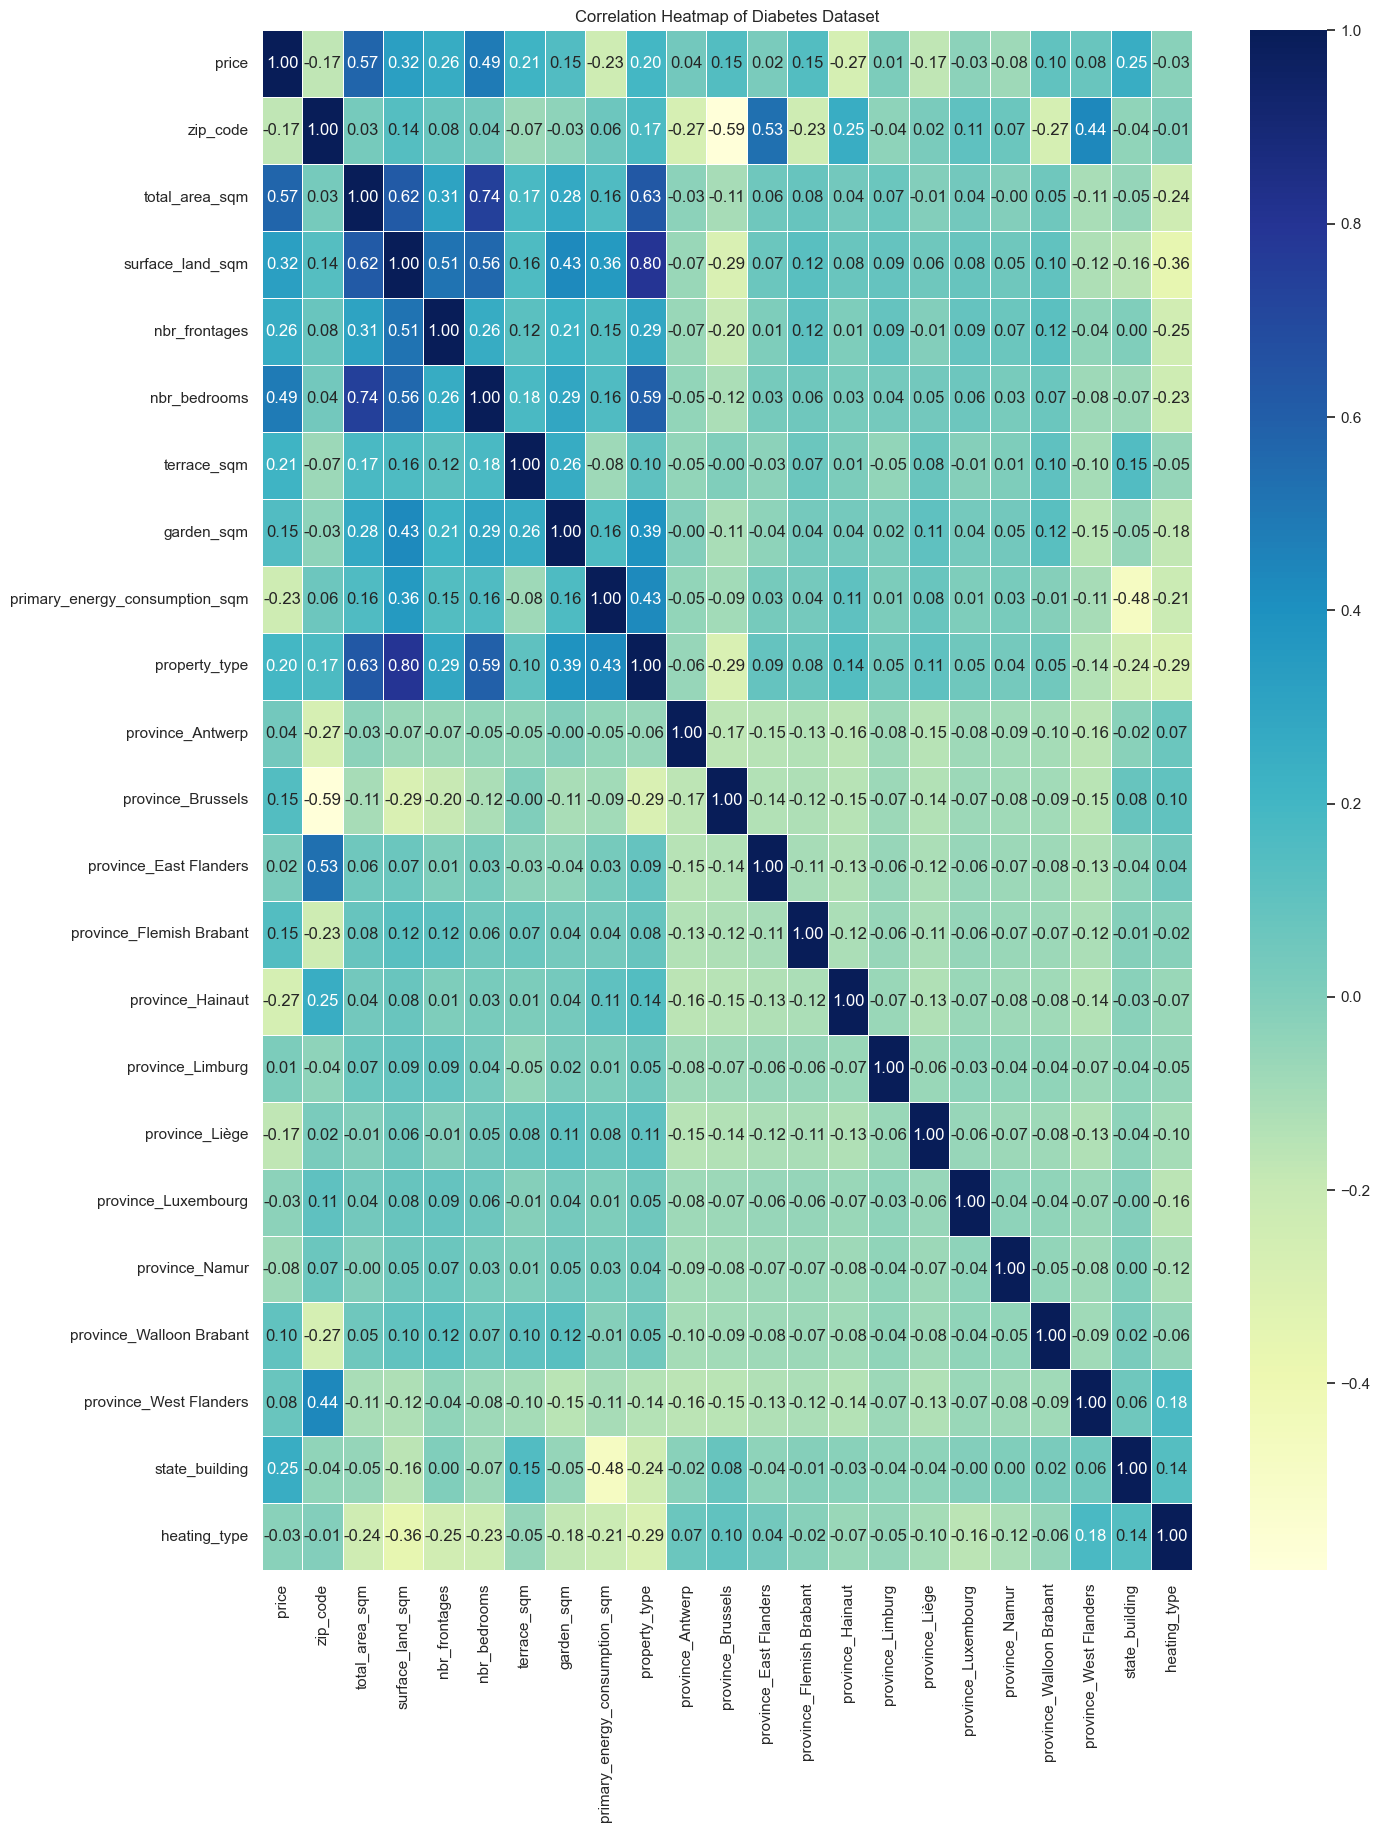

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = numeric_df.corr(method='spearman')
plt.figure(figsize=(15, 20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Dataset")
plt.show()

In [719]:


#Apartment
df_apat = numeric_df[numeric_df['property_type'] == 0]
print(len(df_apat['property_type'])) #Same as surface_land_sqm 

#r =  numeric_df.loc[pd.isna(numeric_df['total_area_sqm']), ['property_type']]
#r =  numeric_df.loc[pd.isna(numeric_df['garden_sqm']), ['property_type']]
#r =  numeric_df.loc[pd.isna(numeric_df['terrace_sqm']), ['property_type']]
#r =  numeric_df.loc[numeric_df['property_type'] > 0, ['terrace_sqm']]
#r =  numeric_df.loc[numeric_df['property_type'] > 0, ['total_area_sqm']]
#r =  numeric_df.loc[numeric_df['property_type'] > 0, ['garden_sqm']]

#print(r.sort_values(by='terrace_sqm',ascending=False))

numeric_df.isnull().sum()
numeric_df

9973


,price,zip_code,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,terrace_sqm,garden_sqm,primary_energy_consumption_sqm,property_type,state_building,heating_type
0,982700.0,1410.0,169.000000,0.0,2.00000,2.0,20.00000,142.000000,19.0,0.0,5.0,4
1,110000.0,6010.0,150.000000,0.0,2.00000,2.0,13.45191,0.000000,386.0,1.0,2.0,3
2,920000.0,8670.0,174.196395,897.0,4.00000,4.0,40.00000,0.000000,139.0,1.0,4.0,4
3,1495000.0,1083.0,583.000000,1627.0,4.00000,5.0,13.45191,0.000000,498.0,1.0,4.0,4
4,549000.0,9240.0,185.000000,571.0,4.00000,4.0,0.00000,0.000000,142.0,1.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
26350,275000.0,6700.0,174.196395,0.0,2.77318,3.0,0.00000,0.000000,648.0,1.0,1.0,5
26351,199000.0,4100.0,89.000000,0.0,2.00000,2.0,7.00000,0.000000,217.0,0.0,4.0,4
26352,780000.0,1200.0,141.000000,0.0,2.00000,3.0,12.00000,0.000000,95.0,0.0,5.0,4
26353,798000.0,1080.0,400.000000,390.0,2.00000,9.0,53.00000,0.000000,351.0,1.0,2.0,4


### train test modeling


In [46]:
from sklearn.model_selection import train_test_split


X = numeric_df.drop(columns=['price'])
y = numeric_df['price']
# Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=41, test_size=0.2)
print(X_train.shape)


(21084, 22)


In [721]:
# Standardizing each feature using the train mean and standard deviation
'''tese_numeric_df= numeric_df.drop(columns=['price','heating_type','state_building_encoded','property_type'])
for name in tese_numeric_df.columns:
    mean = X_train[name].mean()
    stdev = X_train[name].std()
    
    print(f"Feature '{name}' has mean {mean:.2f} and standard deviation {stdev:.2f}")
    
    X_train[name] = (X_train[name] - mean) / stdev
    X_test[name] = (X_test[name] - mean) / stdev'''

'tese_numeric_df= numeric_df.drop(columns=[\'price\',\'heating_type\',\'state_building_encoded\',\'property_type\'])\nfor name in tese_numeric_df.columns:\n    mean = X_train[name].mean()\n    stdev = X_train[name].std()\n    \n    print(f"Feature \'{name}\' has mean {mean:.2f} and standard deviation {stdev:.2f}")\n    \n    X_train[name] = (X_train[name] - mean) / stdev\n    X_test[name] = (X_test[name] - mean) / stdev'

In [47]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
train_score = regressor.score(X_train, y_train)
print(f"Training score: {train_score:.2f}")

Training score: 0.33


In [49]:


y_pred = regressor.predict(X_test)
print("Predicted Salaries:", y_pred)

Predicted Salaries: [ 727661.77719867  678241.59777972  553326.85029567 ...  187744.54740216
 1067049.64126417  448493.08501685]


In [50]:
test_score = regressor.score(X_test, y_test)
print(f"Testing Score: {test_score:.2f}")

Testing Score: 0.39


### Normalization and test score again

In [51]:
from sklearn.preprocessing import StandardScaler
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [52]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

train_score = regressor.score(X_train, y_train)
print(f"Training score: {train_score:.2f}")

test_score = regressor.score(X_test, y_test)
print(f"Testing Score: {test_score:.2f}")

Training score: 0.33
Testing Score: 0.39


### Try multiple regression - Decision Tree Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=10,min_samples_split=2, random_state=42)

cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
regressor.fit(X_train, y_train)

train_score = regressor.score(X_train, y_train)
print(f"Training score: {train_score:.2f}")

test_score = regressor.score(X_test, y_test)
print(f"Testing Score: {test_score:.2f}")

# Predict
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print("Average Cross-Validation R² Score:", cv_scores.mean())

# Plot the decision tree

plt.figure(figsize=(12, 8))
#plot_tree(regressor, filled=True, feature_names=X.columns)
#plt.show()

Training score: 0.78
Testing Score: 0.66
R² Score: 0.66
Mean Absolute Error: 114609.50
Root Mean Squared Error: 250340.05
Average Cross-Validation R² Score: 0.6347565303813062


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [54]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)

#Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Calculate train and test scores
train_score = xgb_regressor.score(X_train, y_train)
test_score = xgb_regressor.score(X_test, y_test)
print(f"Training R² score: {train_score:.2f}")
print(f"Testing R² score: {test_score:.2f}")


# Predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Training R² score: 0.86
Testing R² score: 0.78
R² Score: 0.78
Mean Absolute Error (MAE): 97298.73
Root Mean Squared Error (RMSE): 202324.32


In [55]:
param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Retrain with best parameters
xgb_best = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xgb_best.fit(X_train, y_train)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
# Calculate train and test scores
train_score = xgb_best.score(X_train, y_train)
test_score = xgb_best.score(X_test, y_test)
print(f"Training R² score: {train_score:.2f}")
print(f"Testing R² score: {test_score:.2f}")

y_pred_best = xgb_best.predict(X_test)

# Calculate metrics
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Best R² Score: {r2_best:.2f}")
print(f"Best Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"Best Root Mean Squared Error (RMSE): {rmse_best:.2f}")

Training R² score: 0.92
Testing R² score: 0.81
Best R² Score: 0.81
Best Mean Absolute Error (MAE): 92155.49
Best Root Mean Squared Error (RMSE): 190072.31
